<a href="https://colab.research.google.com/github/xkrizthx/Python/blob/python/29_36__Request_IEX_Alpha_Cripto_Yahoo_FinHub_Rec_Patrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Requests

Librería que nos permite hacer llamadas HTTP en Python. Es la forma más habitual a la hora de trabajar con APIs

Tutorial:
https://j2logo.com/python/python-requests-peticiones-http/#requests-ficheros

In [ ]:
!pip install requests
import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
r = requests.get('https://es.stackoverflow.com')

In [ ]:
print(r)

<Response [200]>


In [ ]:
print(dir(r)) #para mirar que tiene por dentro

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [ ]:
print(r.text) # imprimie todo el codigo html

<!DOCTYPE html>


    <html class="html__responsive " lang="es">

    <head>

        <title>Stack Overflow en espa&#241;ol</title>
        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/es/Img/favicon.ico?v=9c017e88b153">
        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon.png?v=7739871010e6">
        <link rel="image_src" href="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon.png?v=7739871010e6"> 
        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow en espa&#xF1;ol" href="/opensearch.xml">
        <meta name="description" content="Preguntas y respuestas para programadores y profesionales de la inform&#xE1;tica"/>
    <meta name="viewport" content="width=device-width, height=device-height, initial-scale=1.0, minimum-scale=1.0">
        <meta name="google-site-verification" content="uS5zRTpzXl8rRLx9W7Pd7WBcn6-f9FO4KaDi1Tyln_4"/>
        <meta property="og:type" content= "website" /

In [ ]:
# para que nos devuelva toda la url.
print(r.url) 

https://es.stackoverflow.com/


In [ ]:
# Nos devuelve si la petición es correcta
print(r.status_code)

200


In [ ]:
# Para imprimir las cookies de la pagina web
print(r.cookies)

<RequestsCookieJar[<Cookie prov=26e539af-f2ca-2ae7-ac18-4fcfb455d75b for .stackoverflow.com/>]>


In [ ]:
# imprimir la cabecera de la petición
print(r.headers)
print(r.headers.get('Connection'))

{'Connection': 'keep-alive', 'cache-control': 'private', 'content-type': 'text/html; charset=utf-8', 'content-encoding': 'gzip', 'x-frame-options': 'SAMEORIGIN', 'x-request-guid': '3a1e7592-0887-4429-8d03-71712a570063', 'content-security-policy': "upgrade-insecure-requests; frame-ancestors 'self' https://stackexchange.com", 'Accept-Ranges': 'bytes', 'Date': 'Thu, 15 Sep 2022 01:50:22 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-bur-kbur8200052-BUR', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1663206622.332902,VS0,VE74', 'Vary': 'Accept-Encoding,Fastly-SSL', 'Strict-Transport-Security': 'max-age=300', 'X-DNS-Prefetch-Control': 'off', 'Set-Cookie': 'prov=26e539af-f2ca-2ae7-ac18-4fcfb455d75b; domain=.stackoverflow.com; expires=Fri, 01-Jan-2055 00:00:00 GMT; path=/; HttpOnly', 'transfer-encoding': 'chunked'}
keep-alive


In [ ]:
if(r.status_code == 200):
  print('La petición ha sido realizada correctamente')

La petición ha sido realiza correctamente


# Introducción a IEX Cloud

Es un provedor de datos financieros que provee una API para extraer los datos


[Documentación Iex Cloud](https://iexcloud.io/support/)



# ¿Por que IEX Cloud?

1.   Capa Gratuita (50,000 mesensaje /mes) y Uso Ilimitado del Sandbox Test
2.   Buena documentación 
3.  Interfaz intuitiva con buena capacidad de Monitorización
4. Infraestructura robusta ya que utiliza la cache para almacenar peticiones realizadas con anterioridad ( Versión de Pago)
5. A nivel de pago Es un provedor que ofrece muchisimas opciones



In [ ]:
!pip install iexfinance

#https://addisonlynch.github.io/iexfinance/stable/configuration.html
#Configuración
#Hay cuatro componentes principales de iexfinancela configuración de:

#Autenticación : configuración de su token de autenticación IEX Cloud
#Formato de salida : configuración del formato de salida deseado (salida espejo IEX o Pandas DataFrame)
#Versión de API : especificación de la versión de IEX Cloud para usar
#Depuración : sesiones en caché, reintentos de solicitud y más

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.5 MB/s 


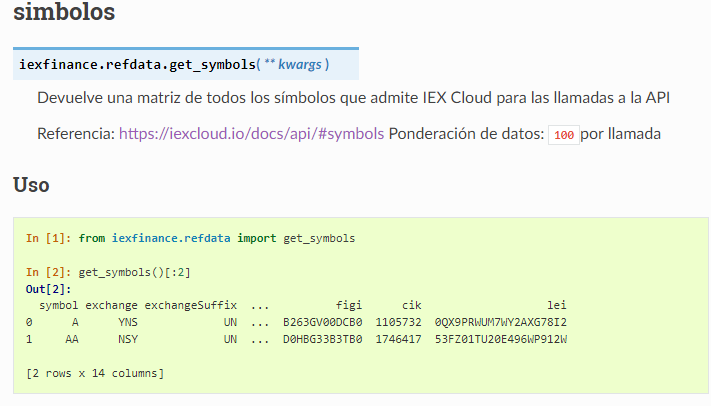

In [ ]:
#https://iexcloud.io/docs/api/#symbols
from iexfinance.refdata import get_symbols

#https://addisonlynch.github.io/iexfinance/stable/stocks.html
from iexfinance.stocks import Stock

import pandas as pd

api_token='pk_c27a89cda4164b0fb14db20633ccfd81'
api_sandobox = 'Tpk_bd997f1924174db6b06d818b2dbcd3b2'


In [ ]:
get_symbols(token=api_token)

,symbol,exchange,exchangeSuffix,exchangeName,exchangeSegment,exchangeSegmentName,name,date,type,iexId,region,currency,isEnabled,figi,cik,lei
0,A,XNYS,,New York Stock Exchange Inc,XNYS,New York Stock Exchange Inc,Agilent Technologies Inc.,2022-03-25,cs,IEX_46574843354B2D52,US,USD,True,BBG000C2V3D6,0001090872,QUIX8Y7A2WP0XRMW7G29
1,AA,XNYS,,New York Stock Exchange Inc,XNYS,New York Stock Exchange Inc,Alcoa Corp,2022-03-25,cs,IEX_4238333734532D52,US,USD,True,BBG00B3T3HD3,0001675149,549300T12EZ1F6PWWU29
2,AAA,ARCX,,Nyse Arca,ARCX,Nyse Arca,Listed Funds Trust - AAF First Priority CLO Bo...,2022-03-25,et,IEX_5030314338392D52,US,USD,True,BBG00X5FSP48,0001683471,None
3,AAAU,BATS,,Cboe Bzx U S Equities Exchange,BATS,Cboe Bzx U S Equities Exchange,Goldman Sachs Physical Gold ETF Trust - Goldma...,2022-03-25,et,IEX_474B433136332D52,US,USD,True,BBG00LPXX872,0001708646,None
4,AAC,XNYS,,New York Stock Exchange Inc,XNYS,New York Stock Exchange Inc,Ares Acquisition Corporation - Class A,2022-03-25,cs,None,US,USD,True,BBG00YZC2Z91,0001829432,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11859,ZWS,XNYS,,New York Stock Exchange Inc,XNYS,New York Stock Exchange Inc,Zurn Water Solutions Corp,2022-03-25,cs,None,US,USD,True,BBG000H8R0N8,0001439288,549300XLZXRC2KJ6VK87
11860,ZY,XNAS,,Nasdaq All Markets,XNGS,Nasdaq Ngs Global Select Market,Zymergen Inc,2022-03-25,cs,None,US,USD,True,BBG0077HPN74,0001645842,254900B6L3GN956CY454
11861,ZYME,XNYS,,New York Stock Exchange Inc,XNYS,New York Stock Exchange Inc,Zymeworks Inc,2022-03-25,cs,IEX_5253315838322D52,US,USD,True,BBG00GD15LJ5,0001403752,894500AHOYAGYLYZJL67
11862,ZYNE,XNAS,,Nasdaq All Markets,XNMS,Nasdaq Nms Global Market,Zynerba Pharmaceuticals Inc,2022-03-25,cs,IEX_4E3154424A382D52,US,USD,True,BBG007BBS8B7,0001621443,549300JLJ5VQU2CN6016


In [ ]:
# OJO EJERCICIO BUENISIMO  PARA IMPORTAR DATOS
#https://www.datasource.ai/uploads/026d8d16ea1e8f4698e716f66e4aa264.html
#Esta en el ejercicio 29_Refuerzo_Request

# Los nombres de las empresas
#Obtener los símbolos del NASDAQ
#El mercado de valores NASDAQ identifica cada una de sus acciones con un símbolo único:

#Apple - APPL
#Google - GOOGL
#Tesla - TSLA

# iex CLOUD SIMBOLOS https://iexcloud.io/docs/api/#symbols

#Ojo PIB per cápita (US$ a precios actuales) -->'NY.GDP.PCAP.KD'
#https://datos.bancomundial.org/indicator/NY.GDP.PCAP.CD
#https://databank.bancomundial.org/metadataglossary/sustainable-development-goals-(sdgs)/series/NY.GDP.PCAP.CD


a = Stock("AMZN", token=api_token)   #obtener los datos de cotización que tiene una empresa
a = Stock("ZYNE", token=api_token)
a.get_quote()
#aapl = Stock("AAPL", token=api_token)
#aapl.get_price()
#a.get_quote()

,avgTotalVolume,calculationPrice,change,changePercent,close,closeSource,closeTime,companyName,currency,delayedPrice,...,openTime,peRatio,previousClose,previousVolume,primaryExchange,symbol,volume,week52High,week52Low,ytdChange
ZYNE,366009,tops,0.02,0.00952,None,official,None,Zynerba Pharmaceuticals Inc,USD,None,...,None,None,2.1,640270,NASDAQ,ZYNE,None,6.07,1.81,-0.261313


# ¿Que es la Beta de una empresa?

Beta es una medida de la volatilidad, o riesgo sistemático, de un valor o cartera en comparación con el mercado en su conjunto

El coeficiente beta (β) de una acción mide el grado de variabilidad de la rentabilidad de una acción respecto a la rentabilidad promedio del "mercado" en que se negocia y por ello es un concepto muy utilizado por los analistas financieros. La beta (β) mide el 'riesgo sistémático' o 'de mercado'.

https://www.youtube.com/watch?v=tDVoV3uxjRI

https://www.youtube.com/watch?v=D0DKrMFjrLo&t=248s

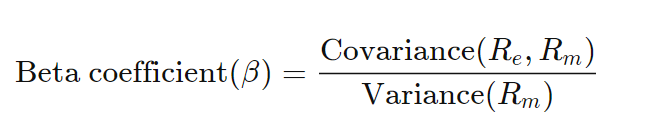

* Re --> Retorno de la empresa
* Rm --> Retorno del mercado 

* La varianza Rm  mide cuanto diferencia de ganacias existen respecto de la media
* La covarianza Re,Rm nos mide cuanto cambia el beneficio de una empresa determina respecto del beneficio del indice de referencia, tipicamente el syp500

Si B>1 Indica que la voltailidad del activo es superior al mercado. 
Esto implica que el riesgo-beneficio es mayor y viceversa.
* Ejemplo de empresas B>1: AMZN,TSLA,APPLE
* B<1 : COKE, JNJ


* Si B<0 NOS indica que el activo esta inversamente correlado con el mercado.

In [ ]:
a.get_beta()

1.0619737987438636

# API batch

Significa llamadas por lotes

In [ ]:
stocks = ["TSLA", "AMZN","MSFT","SPOT"]

In [ ]:
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token=api_token)
    company_info = stock_batch.get_company()
    return company_info

In [ ]:
getCompanyInfo(stocks)   # Información de las 4 compañias

,symbol,companyName,exchange,industry,website,description,CEO,securityName,issueType,sector,primarySicCode,employees,tags,address,address2,state,city,zip,country,phone
TSLA,TSLA,Tesla Inc,NASDAQ,Automobile Manufacturing,www.tesla.com,Tesla’s mission is to accelerate the world’s t...,Elon Musk,Tesla Inc,cs,Manufacturing,3711,70757,"[Consumer Durables, Motor Vehicles, Manufactur...",3500 Deer Creek Rd,None,California,Palo Alto,94304-1317,US,16506815000
AMZN,AMZN,Amazon.com Inc.,NASDAQ,Electronic Shopping and Mail-Order Houses,aboutamazon.com,Amazon is guided by four principles: customer ...,Jeffrey Bezos,Amazon.com Inc.,cs,Retail Trade,5961,1298000,"[Retail Trade, Internet Retail]",410 Terry Ave N,None,Washington,Seattle,98109-5210,US,12062661000
MSFT,MSFT,Microsoft Corporation,NASDAQ,"Data Processing, Hosting, and Related Services",www.microsoft.com,Microsoft enables digital transformation for t...,Satya Nadella,Microsoft Corporation,cs,Information,7372,163000,"[Technology Services, Packaged Software, Infor...",1 Microsoft Way,None,Washington,Redmond,98052-6399,US,14258828080
SPOT,SPOT,Spotify Technology S.A.,NEW YORK STOCK EXCHANGE INC.,Software Publishers,www.spotify.com,Spotify is the world's most popular audio stre...,Daniel Ek,Spotify Technology S.A.,cs,Information,4832,5584,"[Technology Services, Internet Software/Servic...",None,None,Luxembourg,42 44 Avenue De La Gare,1610,Luxembourg,46702204607


In [ ]:
def getEarnings(symbol):
    stock_batch = Stock(symbol,
                        token=api_token)
    earnings = stock_batch.get_earnings(last=1)
    return earnings

In [ ]:
getEarnings('AMZN')

IEXQueryError: ignored

In [ ]:
getCompanyInfo(stocks)

,symbol,companyName,exchange,industry,website,description,CEO,securityName,issueType,sector,primarySicCode,employees,tags,address,address2,state,city,zip,country,phone
TSLA,TSLA,Tesla Inc,NASDAQ,Automobile Manufacturing,www.tesla.com,Tesla’s mission is to accelerate the world’s t...,Elon Musk,Tesla Inc,cs,Manufacturing,3711,70757,"[Consumer Durables, Motor Vehicles, Manufactur...",3500 Deer Creek Rd,None,California,Palo Alto,94304-1317,US,16506815000
AMZN,AMZN,Amazon.com Inc.,NASDAQ,Electronic Shopping and Mail-Order Houses,aboutamazon.com,Amazon is guided by four principles: customer ...,Jeffrey Bezos,Amazon.com Inc.,cs,Retail Trade,5961,1298000,"[Retail Trade, Internet Retail]",410 Terry Ave N,None,Washington,Seattle,98109-5210,US,12062661000
MSFT,MSFT,Microsoft Corporation,NASDAQ,"Data Processing, Hosting, and Related Services",www.microsoft.com,Microsoft enables digital transformation for t...,Satya Nadella,Microsoft Corporation,cs,Information,7372,163000,"[Technology Services, Packaged Software, Infor...",1 Microsoft Way,None,Washington,Redmond,98052-6399,US,14258828080
SPOT,SPOT,Spotify Technology S.A.,NEW YORK STOCK EXCHANGE INC.,Software Publishers,www.spotify.com,Spotify is the world's most popular audio stre...,Daniel Ek,Spotify Technology S.A.,cs,Information,4832,5584,"[Technology Services, Internet Software/Servic...",None,None,Luxembourg,42 44 Avenue De La Gare,1610,Luxembourg,46702204607


In [ ]:
from datetime import datetime
import pandas as pd

from iexfinance.stocks import get_historical_data

start = datetime(2018, 1, 1)
end = datetime(2018, 3, 1)

df = get_historical_data("TSLA", start, end,token=api_token)

IEXQueryError: ignored

In [ ]:
get_historical_data(["AAPL", "TSLA", "MSFT"], output_format='pandas',token=api_token)

NameError: ignored

In [ ]:
df 

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2018-01-02,64.106,64.422,62.2,62.4,TSLA,21761205,HISTORICAL_PRICES,TSLA,,1647302657306.161865,...,311,4352241,62.4,64.106,64.422,62.2,21761205,"Jan 2, 18",1.836,0.0295
2018-01-03,63.45,65.05,63.11,64.2,TSLA,22607635,HISTORICAL_PRICES,TSLA,,1647302657296.883057,...,315.55,4521527,64.2,63.45,65.05,63.11,22607635,"Jan 3, 18",-0.656,-0.0102
2018-01-04,62.924,63.71,61.136,62.574,TSLA,49731520,HISTORICAL_PRICES,TSLA,,1647302657294.805908,...,305.68,9946304,62.574,62.924,63.71,61.136,49731520,"Jan 4, 18",-0.526,-0.0083
2018-01-05,63.316,63.448,62.4,63.324,TSLA,22955900,HISTORICAL_PRICES,TSLA,,1647302657303.446045,...,312,4591180,63.324,63.316,63.448,62.4,22955900,"Jan 5, 18",0.392,0.0062
2018-01-08,67.282,67.404,63.1,63.2,TSLA,49297175,HISTORICAL_PRICES,TSLA,,1647302657317.089111,...,315.5,9859435,63.2,67.282,67.404,63.1,49297175,"Jan 8, 18",3.966,0.0626
2018-01-09,66.738,67.76,65.481,67.032,TSLA,35733155,HISTORICAL_PRICES,TSLA,,1647302657294.805908,...,327.405,7146631,67.032,66.738,67.76,65.481,35733155,"Jan 9, 18",-0.544,-0.0081
2018-01-10,66.96,67.4,66,66.44,TSLA,21549630,HISTORICAL_PRICES,TSLA,,1647302657299.422119,...,330,4309926,66.44,66.96,67.4,66,21549630,"Jan 10, 18",0.222,0.0033
2018-01-11,67.59,68.962,66.652,67.048,TSLA,33227420,HISTORICAL_PRICES,TSLA,,1647302657303.446045,...,333.26,6645484,67.048,67.59,68.962,66.652,33227420,"Jan 11, 18",0.63,0.0094
2018-01-12,67.244,68.082,66.734,67.726,TSLA,24125295,HISTORICAL_PRICES,TSLA,,1647302657300.88501,...,333.67,4825059,67.726,67.244,68.082,66.734,24125295,"Jan 12, 18",-0.346,-0.0051
2018-01-16,68.012,69,66.96,67.508,TSLA,32371255,HISTORICAL_PRICES,TSLA,,1647302657307.125977,...,334.8,6474251,67.508,68.012,69,66.96,32371255,"Jan 16, 18",0.768,0.0114


In [ ]:
df1 = df[['close','open','high','low','volume','symbol']]

In [ ]:
df1

,close,open,high,low,volume,symbol
2017-01-03,43.398,42.972,44.066,42.192,29616270,TSLA
2017-01-04,45.398,42.95,45.6,42.862,56067355,TSLA
2017-01-05,45.35,45.284,45.496,44.39,29558475,TSLA
2017-01-06,45.802,45.386,46.062,45.09,27639465,TSLA
2017-01-09,46.256,45.794,46.384,45.6,19897420,TSLA
...,...,...,...,...,...,...
2017-12-22,65.04,65.902,66.1843,64.964,21079035,TSLA
2017-12-26,63.458,64.766,64.788,63.316,21892065,TSLA
2017-12-27,62.328,63.2,63.536,62.15,23560555,TSLA
2017-12-28,63.072,62.35,63.164,61.908,21581735,TSLA


In [ ]:
df

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
2018-01-02,64.106,64.422,62.2,62.4,TSLA,21761205,HISTORICAL_PRICES,TSLA,,1647302657306.161865,...,311,4352241,62.4,64.106,64.422,62.2,21761205,"Jan 2, 18",1.836,0.0295
2018-01-03,63.45,65.05,63.11,64.2,TSLA,22607635,HISTORICAL_PRICES,TSLA,,1647302657296.883057,...,315.55,4521527,64.2,63.45,65.05,63.11,22607635,"Jan 3, 18",-0.656,-0.0102
2018-01-04,62.924,63.71,61.136,62.574,TSLA,49731520,HISTORICAL_PRICES,TSLA,,1647302657294.805908,...,305.68,9946304,62.574,62.924,63.71,61.136,49731520,"Jan 4, 18",-0.526,-0.0083
2018-01-05,63.316,63.448,62.4,63.324,TSLA,22955900,HISTORICAL_PRICES,TSLA,,1647302657303.446045,...,312,4591180,63.324,63.316,63.448,62.4,22955900,"Jan 5, 18",0.392,0.0062
2018-01-08,67.282,67.404,63.1,63.2,TSLA,49297175,HISTORICAL_PRICES,TSLA,,1647302657317.089111,...,315.5,9859435,63.2,67.282,67.404,63.1,49297175,"Jan 8, 18",3.966,0.0626
2018-01-09,66.738,67.76,65.481,67.032,TSLA,35733155,HISTORICAL_PRICES,TSLA,,1647302657294.805908,...,327.405,7146631,67.032,66.738,67.76,65.481,35733155,"Jan 9, 18",-0.544,-0.0081
2018-01-10,66.96,67.4,66,66.44,TSLA,21549630,HISTORICAL_PRICES,TSLA,,1647302657299.422119,...,330,4309926,66.44,66.96,67.4,66,21549630,"Jan 10, 18",0.222,0.0033
2018-01-11,67.59,68.962,66.652,67.048,TSLA,33227420,HISTORICAL_PRICES,TSLA,,1647302657303.446045,...,333.26,6645484,67.048,67.59,68.962,66.652,33227420,"Jan 11, 18",0.63,0.0094
2018-01-12,67.244,68.082,66.734,67.726,TSLA,24125295,HISTORICAL_PRICES,TSLA,,1647302657300.88501,...,333.67,4825059,67.726,67.244,68.082,66.734,24125295,"Jan 12, 18",-0.346,-0.0051
2018-01-16,68.012,69,66.96,67.508,TSLA,32371255,HISTORICAL_PRICES,TSLA,,1647302657307.125977,...,334.8,6474251,67.508,68.012,69,66.96,32371255,"Jan 16, 18",0.768,0.0114


In [ ]:
from iexfinance.stocks import Stock
aapl = Stock("AAPL", output_format='pandas',token=api_token)


In [ ]:
aapl.get_quote()

,avgTotalVolume,calculationPrice,change,changePercent,close,closeSource,closeTime,companyName,currency,delayedPrice,...,openTime,peRatio,previousClose,previousVolume,primaryExchange,symbol,volume,week52High,week52Low,ytdChange
AAPL,97231945,tops,-0.53,-0.00304,None,official,None,Apple Inc,USD,None,...,None,28.83,174.07,90131418,NASDAQ,AAPL,None,182.71,118.16,-0.021502


In [ ]:
air = Stock(["AAL", "LUV", "DAL"], output_format='pandas',token=api_token)
air.get_quote()

,avgTotalVolume,calculationPrice,change,changePercent,close,closeSource,closeTime,companyName,currency,delayedPrice,...,peRatio,previousClose,previousVolume,primaryExchange,symbol,volume,week52High,week52Low,ytdChange,isUSMarketOpen
AAL,55738011,tops,0.425,0.02542,None,official,None,American Airlines Group Inc,USD,None,...,-5.55,16.72,33893987,NASDAQ,AAL,None,26.04,12.44,-0.043622,True
LUV,9460282,tops,0.495,0.01127,None,official,None,Southwest Airlines Co,USD,None,...,27.76,43.92,4528797,NEW YORK STOCK EXCHANGE INC.,LUV,None,64.75,36.75,0.03648,True
DAL,20130098,tops,0.59,0.01583,None,official,None,"Delta Air Lines, Inc.",USD,None,...,86.65,37.26,11302383,NEW YORK STOCK EXCHANGE INC.,DAL,None,51.82,29.75,-0.030741,True


IEXAuthenticationError: ignored

# Alphavantage

# ¿Por que AlphaVantage?


*   Capa gratuita.(5 peticiones por minuto y 500 peticiones en un día)
*   Nos da cierta información de manera gratuita que IEX no(Información  sobre sectoress)
* Información sobre Criptomonedas y Forex de manera gratuita

https://www.alphavantage.co/

Nos registramos
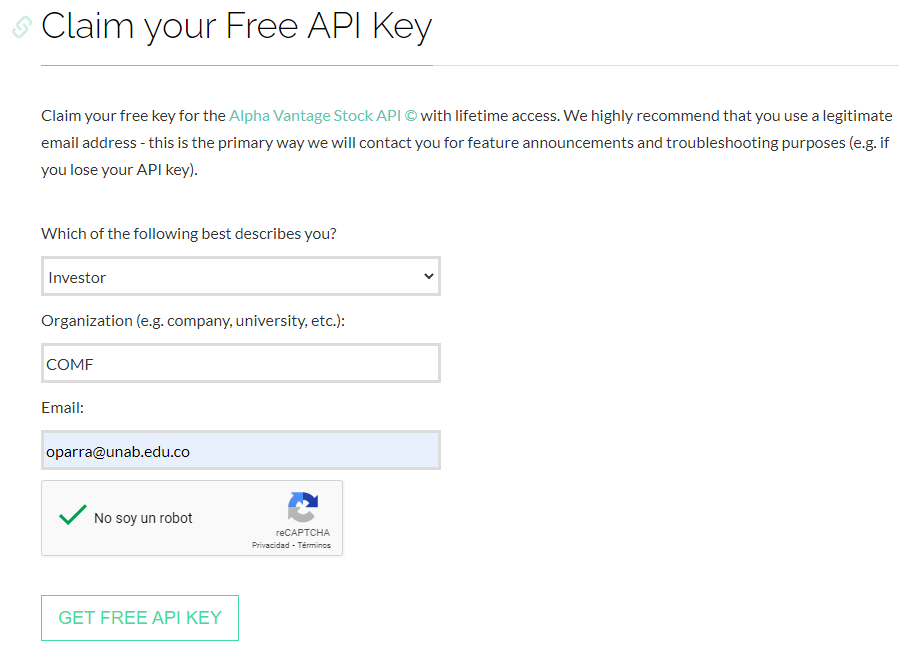



y obtenemos la API-KEY

Welcome to Alpha Vantage! Here is your API key: KDNXTDBV5WFC6SB4. Please record this API key at a safe place for future data access.

y NOS VAMOS a documentacion

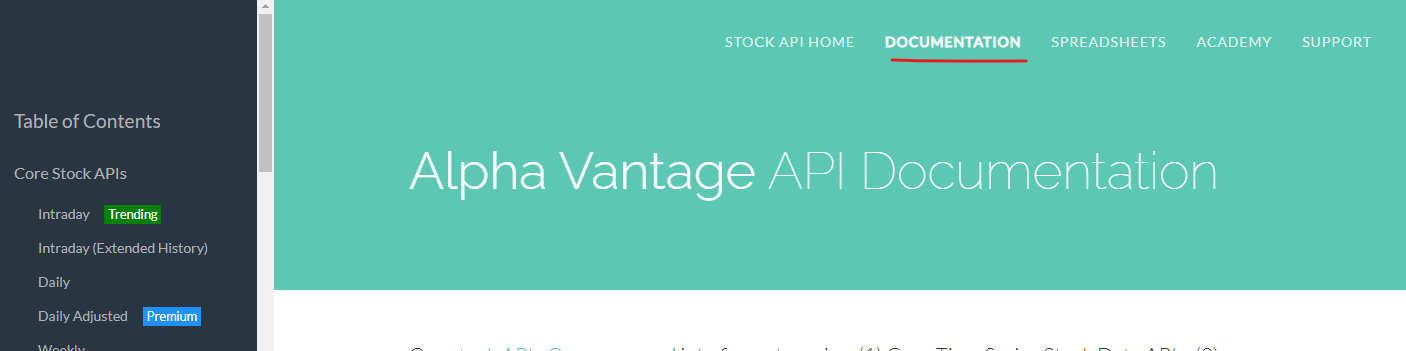



In [ ]:
!pip install alpha_vantage
api_key ='KDNXTDBV5WFC6SB4'

     |████████████████████████████████| 1.1 MB 7.9 MB/s 
     |████████████████████████████████| 271 kB 39.3 MB/s 
     |████████████████████████████████| 94 kB 2.3 MB/s 
     |████████████████████████████████| 144 kB 50.1 MB/s 


In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=api_key, output_format='pandas')   
#Documetnacion https://www.alphavantage.co/documentation/
data, meta_data = ts.get_intraday(symbol='AMZN',interval='60min', outputsize='compact')
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-03-24 20:00:00,3265.01,3266.00,3262.00,3262.00,1750.0
2022-03-24 19:00:00,3270.00,3270.00,3268.00,3268.00,621.0
2022-03-24 17:00:00,3272.99,3272.99,3264.00,3269.47,205611.0
2022-03-24 16:00:00,3255.02,3273.14,3250.00,3272.84,421025.0
2022-03-24 15:00:00,3262.23,3272.81,3243.01,3253.71,212953.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-03-22 20:00:00 to 2022-03-14 08:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [ ]:
meta_data

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'AMZN',
 '3. Last Refreshed': '2022-03-22 20:00:00',
 '4. Interval': '60min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

# Intervalos en dataday 
1min, 5min, 15min, 30min, 60min

In [ ]:
ts.get_daily(symbol='AMZN')

(             1. open   2. high   3. low  4. close  5. volume
 date                                                        
 2022-03-22  3236.110  3323.340  3233.98   3297.78  3147275.0
 2022-03-21  3222.415  3261.680  3191.06   3229.83  3283142.0
 2022-03-18  3136.260  3231.880  3120.22   3225.01  5063616.0
 2022-03-17  3052.810  3149.970  3042.80   3144.78  3646742.0
 2022-03-16  2970.000  3063.000  2947.07   3062.08  4247884.0
 ...              ...       ...      ...       ...        ...
 2021-11-03  3309.000  3394.920  3297.52   3384.00  3397189.0
 2021-11-02  3315.010  3331.115  3283.55   3312.75  2562277.0
 2021-11-01  3361.800  3375.860  3292.02   3318.11  3582044.0
 2021-10-29  3300.020  3374.820  3273.32   3372.43  6486077.0
 2021-10-28  3402.095  3479.000  3386.00   3446.57  5708733.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AMZN',
  '3. Last Refreshed': '2022-03-22',
  '4. Output Size': 'Compact',
  '

In [ ]:
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min',outputsize='compact')

In [ ]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-03-22 19:58:00,304.31,304.31,304.31,304.31,2573.0
2022-03-22 19:53:00,304.24,304.50,304.24,304.50,825.0
2022-03-22 19:52:00,303.98,303.99,303.98,303.99,632.0
2022-03-22 19:38:00,303.86,303.86,303.86,303.86,101.0
2022-03-22 19:37:00,303.86,303.86,303.86,303.86,320.0


# Uso de Request

In [ ]:
import requests as rq
params ={'function':'TIME_SERIES_INTRADAY_EXTENDED','symbol':'MSFT','interval':'15min','slice':'year1month1','apikey':api_key,'datatype':'json'}
data = rq.get('https://www.alphavantage.co/query',params=params)

In [ ]:
data.content


b'time,open,high,low,close,volume\r\n2022-03-22 20:00:00,303.98,304.5,303.98,304.31,4030\r\n2022-03-22 19:45:00,304.0,304.0,303.86,303.86,2303\r\n2022-03-22 19:30:00,303.98,303.98,303.87,303.87,1929\r\n2022-03-22 19:15:00,304.29,304.31,304.16,304.31,827\r\n2022-03-22 19:00:00,304.21,304.25,304.15,304.22,2560\r\n2022-03-22 18:45:00,303.82,304.21,303.82,304.21,2495\r\n2022-03-22 18:30:00,303.75,304.06,303.74,303.81,3083\r\n2022-03-22 18:15:00,303.8,303.9,303.73,303.73,1808\r\n2022-03-22 18:00:00,303.9,303.9,303.89,303.89,699\r\n2022-03-22 17:45:00,303.8,303.8,303.8,303.8,387\r\n2022-03-22 17:30:00,303.9,303.9,303.8,303.88,3083\r\n2022-03-22 17:15:00,303.96,304.0,303.92,303.92,1630\r\n2022-03-22 17:00:00,304.14,304.14,303.92,304.0,6166\r\n2022-03-22 16:45:00,304.07,304.18,303.95,304.14,102904\r\n2022-03-22 16:30:00,303.7101,304.19,303.7101,304.19,7360\r\n2022-03-22 16:15:00,304.06,304.31,303.52,303.99,1529186\r\n2022-03-22 16:00:00,303.85,304.44,303.37,304.17,2423547\r\n2022-03-22 15:45:0

# Información por Sectores.

In [ ]:
# Explicacion https://ichi.pro/es/uso-de-la-api-de-alphavantage-para-realizar-analisis-tecnicos-en-python-39860275999461
from alpha_vantage.sectorperformance import SectorPerformances    # Rendimiento del Sector.
import matplotlib.pyplot as plt
sp = SectorPerformances(key=api_key, output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000
mean,0.008609,0.011027,0.020509,0.073345,0.002191,-0.012182,0.181809,0.501409,0.711000,1.884400
std,0.007207,0.007384,0.019901,0.040772,0.141923,0.139962,0.161581,0.264944,0.531059,1.326746
min,-0.001900,0.001300,-0.006600,-0.004400,-0.123200,-0.116200,-0.022400,0.212600,0.163700,0.086800
25%,0.004550,0.006850,0.007100,0.061450,-0.075600,-0.092300,0.112550,0.336850,0.394300,1.113175
50%,0.008100,0.007600,0.010300,0.080200,-0.010500,-0.034500,0.160600,0.491700,0.567700,1.544500
75%,0.012700,0.014200,0.034700,0.089200,0.001950,-0.013350,0.192000,0.586500,0.768300,2.561825
max,0.022800,0.027100,0.051300,0.148100,0.405300,0.390800,0.626900,1.167200,2.111700,4.670600


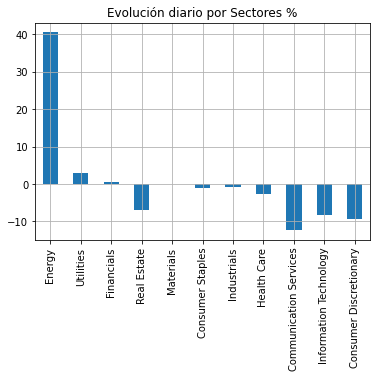

In [ ]:
(data['Rank E: Month Performance']*100).plot(kind='bar')
plt.title('Evolución diario por Sectores %')
plt.grid()
plt.show()

# Indicadores Tecnicos
No funcion por permisos.... de alphaventaje

In [ ]:

from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt
import pandas as pd
ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='AMZN', interval='60min', time_period=60)
data.plot()
plt.title('Bandas de Bolinger en AMZN 60 min')
plt.show()

ValueError: ignored

Text(0.5, 1.0, 'ATR AMZN en Intervalo de 60 min calculado segun 60 Periodos.')

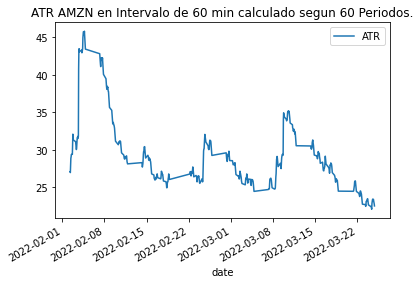

In [ ]:
data , meta_data = ti.get_atr(symbol='AMZN',interval='60min',time_period=60)
data.plot()
plt.title('ATR AMZN en Intervalo de 60 min calculado segun 60 Periodos.')

El ATR(Averge True Range) mide la flutación del precio, es decir la volatilidad.
* Nos ayuda para establecer los stops de ventas.
* Es útil para en operaciones de corta duración establecer los take profits.
* Ejemplo: Viendo el gráfico de AMZN vemos que el ATR está entorno a 15 de media en las ultimas sesiones. Podemos definir nuestro stop en 3 ATR es decir estaremos ariesgado en la operaci
45/3240

In [ ]:
((3*15)/3240)*100

1.3888888888888888

In [ ]:
data

,ATR
date,
2022-01-31 06:00:00,33.2730
2022-01-31 08:00:00,33.0749
2022-01-31 09:00:00,32.8187
2022-01-31 10:00:00,33.2497
2022-01-31 11:00:00,33.4090
...,...
2022-03-22 16:00:00,24.0680
2022-03-22 17:00:00,23.7242
2022-03-22 18:00:00,23.3604


# Media Movil

https://www.ig.com/es/glosario-trading/definicion-de-media-movil

¿Qué es una media móvil?
Una media móvil es un indicador técnico que combina precios de un activo a lo largo de un período de tiempo establecido, y los divide entre el número de datos recogidos para dar una línea de tendencia. Es popular entre los inversores porque puede ayudar a determinar la dirección de una tendencia actual y reducir el impacto de subidas de precio repentinas.

Analizando movimientos previos en el precio de un activo, una media móvil te permitirá examinar tus niveles de soporte y resistencia. Es una medida de cambio que rastrea el precio anterior de un activo y evalúa el historial de los movimientos de mercado para calcular posibles patrones futuros. Una media móvil es principalmente un indicador rezagado, lo que la convierte en una de las herramientas más populares de análisis técnico.

Esto se debe a que calcular una media móvil (MM) requiere una cantidad determinada de datos, que depende del período para el que se calcule la media. Para calcular una media móvil de diez días, se necesitarán los datos de diez días y, para calcular la de un año, se necesitarán los datos de 365 días. Uno de los plazos más habituales para calcular una media móvil es el de 200 días.

Este indicador se denomina ‘móvil’ porque conforme se van introduciendo datos más recientes en la gráfica, éstos remplazan a los más antiguos.

In [ ]:
data,meta_data= ti.get_sma(symbol='AMZN',interval='daily',time_period=10,series_type='close')
price = data_p, meta_data = ts.get_daily(symbol='AMZN',outputsize='compact')

In [ ]:
price

(             1. open   2. high   3. low  4. close  5. volume
 date                                                        
 2022-03-22  3236.110  3323.340  3233.98   3297.78  3147275.0
 2022-03-21  3222.415  3261.680  3191.06   3229.83  3283142.0
 2022-03-18  3136.260  3231.880  3120.22   3225.01  5063616.0
 2022-03-17  3052.810  3149.970  3042.80   3144.78  3646742.0
 2022-03-16  2970.000  3063.000  2947.07   3062.08  4247884.0
 ...              ...       ...      ...       ...        ...
 2021-11-03  3309.000  3394.920  3297.52   3384.00  3397189.0
 2021-11-02  3315.010  3331.115  3283.55   3312.75  2562277.0
 2021-11-01  3361.800  3375.860  3292.02   3318.11  3582044.0
 2021-10-29  3300.020  3374.820  3273.32   3372.43  6486077.0
 2021-10-28  3402.095  3479.000  3386.00   3446.57  5708733.0
 
 [100 rows x 5 columns],
 {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AMZN',
  '3. Last Refreshed': '2022-03-22',
  '4. Output Size': 'Compact',
  '

In [ ]:
data

,SMA
date,
1999-11-12,69.813
1999-11-15,70.250
1999-11-16,71.500
1999-11-17,72.569
1999-11-18,74.057
...,...
2022-03-16,2881.903
2022-03-17,2900.584
2022-03-18,2931.803


# Obter Información de Criptomonedas

In [ ]:
!pip install python-binance

     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 35.7 MB/s 
     |████████████████████████████████| 103 kB 62.7 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 288 kB 43.3 MB/s 
     |████████████████████████████████| 144 kB 65.0 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 64.6 MB/s 


In [ ]:
!pip install alpha_vantage
api_key ='KDNXTDBV5WFC6SB4'

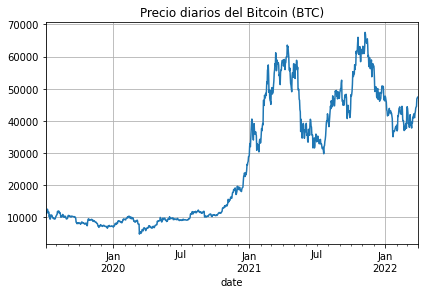

In [ ]:
#Link bueno que es el trading
#https://academy.binance.com/es/articles/a-complete-guide-to-cryptocurrency-trading-for-beginners?utm_campaign=googleadsxacademy&utm_source=googleadwords_int&utm_medium=cpc&gclid=Cj0KCQjw3IqSBhCoARIsAMBkTb1UROEb2nfj-qQUIOU-3yoe6CFYdGMiWcl0jz5xU6HrgtBjLCwYY1IaAmE4EALw_wcB



from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key=api_key, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='USD')
# https://es.wikipedia.org/wiki/Mercado_de_divisas
# tabla de monedas digitales: https://coinmarketcap.com/es/all/views/all/
# BTC es el simbolo de bitcoin
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Precio diarios del Bitcoin (BTC)')
plt.grid()
plt.show()

In [ ]:
data

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2022-03-29,47122.21,47122.21,47509.07,47509.07,47050.00,47050.00,47372.61,47372.61,1466.962920,1466.962920
2022-03-28,46827.76,46827.76,48189.84,48189.84,46663.56,46663.56,47122.21,47122.21,58949.261400,58949.261400
2022-03-27,44511.27,44511.27,46999.00,46999.00,44421.46,44421.46,46827.76,46827.76,41874.910710,41874.910710
2022-03-26,44313.16,44313.16,44792.99,44792.99,44071.97,44071.97,44511.27,44511.27,23041.617410,23041.617410
2022-03-25,43991.46,43991.46,45094.14,45094.14,43579.00,43579.00,44313.16,44313.16,54614.436480,54614.436480
...,...,...,...,...,...,...,...,...,...,...
2019-07-08,11410.00,11410.00,12338.03,12338.03,11220.00,11220.00,12238.60,12238.60,52182.367215,52182.367215
2019-07-07,11256.45,11256.45,11538.00,11538.00,11094.37,11094.37,11406.24,11406.24,38884.795599,38884.795599
2019-07-06,10982.41,10982.41,11665.00,11665.00,10964.51,10964.51,11256.49,11256.49,51469.496331,51469.496331


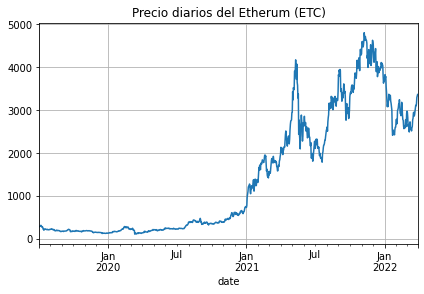

In [ ]:
# Ayuda de la librería https://www.alphavantage.co/documentation/
cc = CryptoCurrencies(key=api_key, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='ETH', market='CNY')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Precio diarios del Etherum (ETC)')
plt.grid()
plt.show()

# Forex

Las API en esta sección brindan una amplia gama de fuentes de datos para tasas de divisas (FX) históricas y en tiempo real.

https://www.youtube.com/watch?v=muYcwJ625No
https://www.youtube.com/watch?v=6jhvJIpT0cE

Que es una divisa
https://www.youtube.com/watch?v=cfhlRrm9ock
Divisa es intercambio de dinero entre paises

Convertidor de divisas
https://www.colombia.com/cambio-moneda/
https://www.youtube.com/watch?v=0kBlHt1bXGk



In [ ]:
from alpha_vantage.foreignexchange import ForeignExchange
cc = ForeignExchange(key=api_key)
# There is no metadata in this call
data, _ = cc.get_currency_exchange_intraday(from_symbol='EUR',to_symbol='USD',interval='1min',outputsize='full')

In [ ]:
data

{'2022-03-29 16:00:00': {'1. open': '1.11064',
  '2. high': '1.11067',
  '3. low': '1.11050',
  '4. close': '1.11066'},
 '2022-03-29 15:59:00': {'1. open': '1.11040',
  '2. high': '1.11080',
  '3. low': '1.11030',
  '4. close': '1.11064'},
 '2022-03-29 15:58:00': {'1. open': '1.11081',
  '2. high': '1.11084',
  '3. low': '1.11030',
  '4. close': '1.11059'},
 '2022-03-29 15:57:00': {'1. open': '1.11115',
  '2. high': '1.11127',
  '3. low': '1.11060',
  '4. close': '1.11081'},
 '2022-03-29 15:56:00': {'1. open': '1.11115',
  '2. high': '1.11118',
  '3. low': '1.11080',
  '4. close': '1.11117'},
 '2022-03-29 15:55:00': {'1. open': '1.11127',
  '2. high': '1.11134',
  '3. low': '1.11100',
  '4. close': '1.11115'},
 '2022-03-29 15:54:00': {'1. open': '1.11151',
  '2. high': '1.11151',
  '3. low': '1.11110',
  '4. close': '1.11131'},
 '2022-03-29 15:53:00': {'1. open': '1.11125',
  '2. high': '1.11165',
  '3. low': '1.11120',
  '4. close': '1.11140'},
 '2022-03-29 15:52:00': {'1. open': '1.1

# Uso de Yahoo Finance

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info, de la empresa MSFT, Microsoft
msft.info

{'52WeekChange': 0.34009063,
 'SandP52WeekChange': 0.14711452,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 311.88,
 'askSize': 2200,
 'averageDailyVolume10Day': 30445570,
 'averageVolume': 38045172,
 'averageVolume10days': 30445570,
 'beta': 0.910925,
 'beta3Year': None,
 'bid': 311.97,
 'bidSize': 800,
 'bookValue': 21.335,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 312.43,
 'currentRatio': 2.247,
 'dateShortInterest': 1647302400,
 'dayHigh': 314.4,
 'dayLow': 309.05,
 'debtToEquity': 50.217,
 'dividendRate': 2.48,
 'dividendYield': 0.0082,
 'earningsGrowth': 0.222,
 'earningsQuarterlyGrowth': 0.214,
 'ebitda': 90829996032,
 'ebitdaMargins': 0.49123,
 'enterpriseToEbitda': 24.57,
 'enterpriseToRevenue': 12.069,
 'enterpriseValue': 2231653367808,
 'exDividendDate': 1652832000,
 'exchange':

In [ ]:
hist = msft.history(period="max") # Es interesante observar como tenemos datos desde 1986!!!!

In [ ]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434,1031788800,0.0,0.0
1986-03-14,0.061434,0.064725,0.061434,0.063628,308160000,0.0,0.0
1986-03-17,0.063628,0.065274,0.063628,0.064725,133171200,0.0,0.0
1986-03-18,0.064725,0.065274,0.062531,0.063079,67766400,0.0,0.0
1986-03-19,0.063079,0.063628,0.061434,0.061982,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-23,300.510010,303.230011,297.720001,299.489990,25715400,0.0,0.0
2022-03-24,299.140015,304.200012,298.320007,304.100006,24484500,0.0,0.0
2022-03-25,305.230011,305.500000,299.290009,303.679993,22550600,0.0,0.0


In [ ]:
msft.recommendations.tail(10)
#Que bancos han comprado estas acciones.

,Firm,To Grade,From Grade,Action
Date,,,,
2021-10-28 14:55:44,Citigroup,Buy,,main
2021-11-02 09:45:19,Deutsche Bank,Buy,,init
2021-12-22 10:02:34,SMBC Nikko,Outperform,,init
2022-01-03 20:23:48,Citigroup,Buy,,main
2022-01-03 20:23:49,Keybanc,Overweight,,main
2022-01-26 14:06:23,BMO Capital,Outperform,,main
2022-01-26 14:42:40,Oppenheimer,Outperform,,main
2022-01-26 15:03:00,Morgan Stanley,Overweight,,main
2022-01-26 15:06:01,Citigroup,Buy,,main


In [ ]:
msft.get_actions()
#Obtener los dividendos
#https://www.andbank.es/observatoriodelinversor/que-es-un-split-y-un-contra-split/
#Un split (o desdoblamiento de acciones) es un ajuste matemático que se realiza al
#valor de las acciones de una compañía, sin cambiar la composición del accionariado. 
#Consiste en disminuir el valor de cada acción y aumentar su número, respetando la proporción 
#monetaria de los inversores.
#Un ejemplo sencillo para entender cómo funciona un split sería el siguiente: Las acciones 
#de una empresa valen 100 euros. Con un split, éstas pasarían a valer, por ejemplo, 10 euros. 
#Tras el ajuste, cada accionista que tuviese una acción de 100 euros, tendría ahora 10 acciones de 10 euros.


,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2019-11-20,0.51,0.0
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0


In [ ]:
msft.get_mutualfund_holders().tail()
#Numero de acciones compradas y por cuanto dinero comprado.

,Holder,Shares,Date Reported,% Out,Value
5,iShares Core S&P 500 ETF,62121793,2021-12-30,0.0083,20892801421
6,Vanguard Growth Index Fund,59595353,2021-12-30,0.0079,20043109120
7,Vanguard Institutional Index Fund-Institutiona...,56570678,2021-12-30,0.0075,19025850424
8,Growth Fund Of America Inc,54293909,2021-11-29,0.0072,17949023376
9,Price (T.Rowe) Blue Chip Growth Fund Inc.,33850124,2021-12-30,0.0045,11384473703


In [ ]:
msft.calendar
#ganancias de la empresa

,0,1
Earnings Date,2022-04-25 10:59:00,2022-04-29 12:00:00
Earnings Average,2.19,2.19
Earnings Low,2.14,2.14
Earnings High,2.29,2.29
Revenue Average,49039300000,49039300000
Revenue Low,48593000000,48593000000
Revenue High,49719000000,49719000000


# Finhub

In [ ]:

api='br38tm7rh5rai6tgfp40'

# ¿Por que Finnhub?

* Proveedor de datos
* https://finnhub.io/

* username: osmapaco01
* correo: oparra@unab.edu.co
* clave: Sistemas$321
* Key:c91lmqqad3if9n5ljcn0

* Capa Gratuita
* STOCK ESTIMATES Data
* STOCK PRICE data
* ETFS & INDICES data 
* FOREX 
* Crypto 
* TECHNICAL ANALYSIS

* Documentación: https://finnhub.io/docs/api


In [ ]:
import requests
import pandas as pd
r = requests.get('https://finnhub.io/api/v1/stock/profile2?symbol=AAPL&token=br38tm7rh5rai6tgfp40')
a = r.json()
print(r.json())

{'country': 'US', 'currency': 'USD', 'exchange': 'NASDAQ NMS - GLOBAL MARKET', 'finnhubIndustry': 'Technology', 'ipo': '1980-12-12', 'logo': 'https://finnhub.io/api/logo?symbol=AAPL', 'marketCapitalization': 2865694, 'name': 'Apple Inc', 'phone': '14089961010.0', 'shareOutstanding': 16319.44, 'ticker': 'AAPL', 'weburl': 'https://www.apple.com/'}


Podemos llevar el Json a un formato validador
https://jsonformatter.curiousconcept.com/
Pegamos el Json anterior y lo validamos.

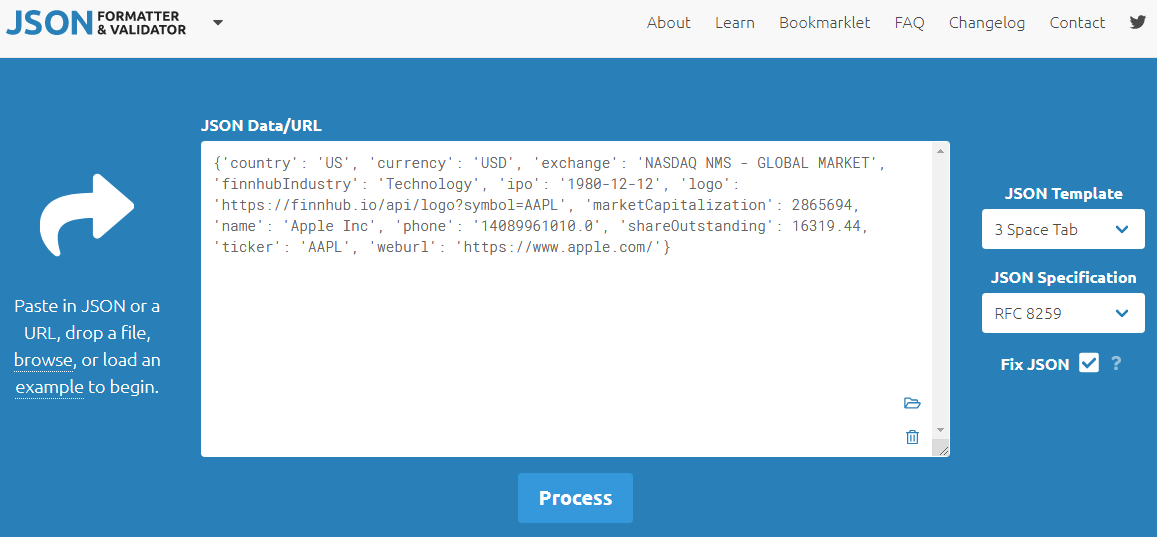

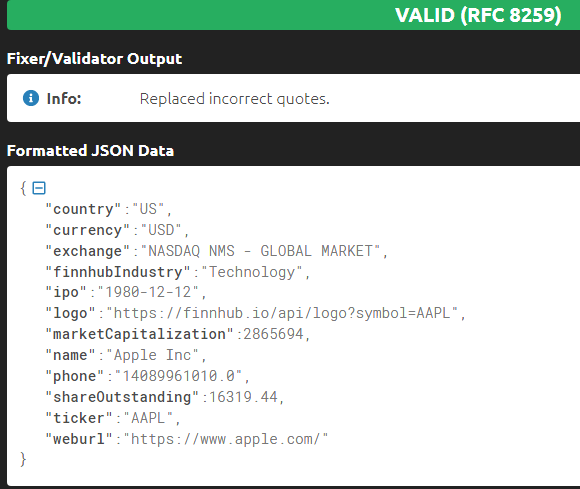

In [ ]:
a.get('name')

'Apple Inc'

In [ ]:
#Para pasar a un formato de tipo panda
df=pd.DataFrame.from_dict(a,orient="index")
print(df)

                                                            0
country                                                    US
currency                                                  USD
exchange                           NASDAQ NMS - GLOBAL MARKET
finnhubIndustry                                    Technology
ipo                                                1980-12-12
logo                  https://finnhub.io/api/logo?symbol=AAPL
marketCapitalization                                  2865694
name                                                Apple Inc
phone                                           14089961010.0
shareOutstanding                                     16319.44
ticker                                                   AAPL
weburl                                 https://www.apple.com/


# Noticias Empresas

Para obtener noticias relacionadas con las empresas

In [ ]:
r = requests.get('https://finnhub.io/api/v1/company-news?symbol=AAPL&from=2020-11-10&to=2022-12-20&token=br38tm7rh5rai6tgfp40')
print(r.json())

[{'category': 'company', 'datetime': 1648565344, 'headline': 'Accused stalker of Apple CEO Tim Cook agrees to stay away', 'id': 108374851, 'image': '', 'related': 'AAPL', 'source': 'Finnhub', 'summary': 'SAN JOSE, Calif. — A woman accused of harassing Apple CEO Tim Cook with pleas for sex and other crude suggestions before showing up at his Silicon Valley home in a threatening manner last... | March 29, 2022', 'url': 'https://finnhub.io/api/news?id=c318742a2178a7e0c76b1cdf9af64007a469d1f958211aa348ec3e5d361ea222'}, {'category': 'company', 'datetime': 1648562251, 'headline': 'Dow Jones Opens Higher As Russia, Ukraine Hold Cease-Fire Talks; Apple, Tesla Gain', 'id': 108362477, 'image': 'https://s.yimg.com/uu/api/res/1.2/d5EFNv_cjVjXKtwlDrnxOw--~B/aD01NjM7dz0xMDAwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/639414d7d8658da2c83f17d50fe53210', 'related': 'AAPL', 'source': 'Yahoo', 'summary': "The stock market opened higher Tuesday, with cease-fire talks between Russia and Ukraine

In [ ]:
news = r.json()

In [ ]:
df_news=pd.DataFrame(news)  #transformar en dataframe
df_news.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1648565344,Accused stalker of Apple CEO Tim Cook agrees t...,108374851,,AAPL,Finnhub,"SAN JOSE, Calif. — A woman accused of harassin...",https://finnhub.io/api/news?id=c318742a2178a7e...
1,company,1648562251,"Dow Jones Opens Higher As Russia, Ukraine Hold...",108362477,https://s.yimg.com/uu/api/res/1.2/d5EFNv_cjVjX...,AAPL,Yahoo,"The stock market opened higher Tuesday, with c...",https://finnhub.io/api/news?id=5870b9a51ae7bfc...
2,company,1648550825,Apple’s Best Run Since 2003 Brings $3 Trillion...,108348491,https://s.yimg.com/uu/api/res/1.2/Xd1U4NHN6.x2...,AAPL,Yahoo,(Bloomberg) -- Apple Inc. shares are heading f...,https://finnhub.io/api/news?id=8f40f86caf264ae...
3,company,1648561567,Here’s Why You Should Consider Investing in Ap...,108362486,https://s.yimg.com/uu/api/res/1.2/m2Yp_y.NF1QU...,AAPL,Yahoo,"Berkshire Hathaway, a multinational conglomera...",https://finnhub.io/api/news?id=74ef058ea3e733a...
4,company,1648560060,Apple Stock Is on Its Hottest Winning Streak S...,108362489,https://s.yimg.com/ny/api/res/1.2/kSjuLaD068ww...,AAPL,Yahoo,Apple's past performances give few clues as to...,https://finnhub.io/api/news?id=936b51aae8ff637...


In [ ]:
from pandas.compat.numpy.function import MEDIAN_DEFAULTS
#df_news_filter = df_news[['headline','datetime','related','source','summary']]  #filtrar por empresas
#Podriamos mirar la información de lo que se esta hablando de una empresa y poder tomar
#una decisión mediante analisis de sentimiento

In [ ]:
df_news_filter

,headline,datetime,related,source,summary
0,Accused stalker of Apple CEO Tim Cook agrees t...,1648565344,AAPL,Finnhub,"SAN JOSE, Calif. — A woman accused of harassin..."
1,"Dow Jones Opens Higher As Russia, Ukraine Hold...",1648562251,AAPL,Yahoo,"The stock market opened higher Tuesday, with c..."
2,Apple’s Best Run Since 2003 Brings $3 Trillion...,1648550825,AAPL,Yahoo,(Bloomberg) -- Apple Inc. shares are heading f...
3,Here’s Why You Should Consider Investing in Ap...,1648561567,AAPL,Yahoo,"Berkshire Hathaway, a multinational conglomera..."
4,Apple Stock Is on Its Hottest Winning Streak S...,1648560060,AAPL,Yahoo,Apple's past performances give few clues as to...
...,...,...,...,...,...
215,Apple Files Arguments With Appeals Court in Ba...,1648162860,AAPL,DowJones,The iPhone maker said a judge was wrong to det...
216,Apple Mulls Subscription Plans for Hardware: R...,1648160820,AAPL,Yahoo,A subscription model could make Apple devices ...
217,Google to Allow Alternative Payment Systems fo...,1648160340,AAPL,Yahoo,Alphabet's Google unit will allow Spotify to o...
218,UPDATE 1-Apple says resolved iMessage issues a...,1648159072,AAPL,Yahoo,Apple Inc said it has resolved the issues that...


# Fundamentales

In [ ]:
#Niveles de soporte y resistencia
#https://admiralmarkets.com/es/education/articles/forex-strategy/soporte-y-resistencia
#https://admiralmarkets.com/es/trading-platforms/metatrader-5
#todas las critpdivisas
#https://coinmarketcap.com/es/all/views/all/


import requests
r = requests.get('https://finnhub.io/api/v1/stock/metric?symbol=AAPL&metric=all&token=br38tm7rh5rai6tgfp40')
print(r.json())

{'metric': {'10DayAverageTradingVolume': 94.89452, '13WeekPriceReturnDaily': -0.88496, '26WeekPriceReturnDaily': 18.92186, '3MonthAverageTradingVolume': 1957.59444, '52WeekHigh': 182.94, '52WeekHighDate': '2022-01-04', '52WeekLow': 118.86, '52WeekLowDate': '2021-03-30', '52WeekPriceReturnDaily': 44.88764, '5DayPriceReturnDaily': 6.54958, 'assetTurnoverAnnual': 1.08408, 'assetTurnoverTTM': 1.02911, 'beta': 1.18895, 'bookValuePerShareAnnual': 3.84068, 'bookValuePerShareQuarterly': 4.40197, 'bookValueShareGrowth5Y': -8.56159, 'capitalSpendingGrowth5Y': -2.73554, 'cashFlowPerShareAnnual': 6.2831, 'cashFlowPerShareTTM': 6.69226, 'cashPerSharePerShareAnnual': 3.81322, 'cashPerSharePerShareQuarterly': 3.91124, 'currentDividendYieldTTM': 0.49508, 'currentEv/freeCashFlowAnnual': 36.24161, 'currentEv/freeCashFlowTTM': 33.49081, 'currentRatioAnnual': 1.07455, 'currentRatioQuarterly': 1.03781, 'dividendGrowthRate5Y': 7.72173, 'dividendPerShare5Y': 0.735, 'dividendPerShareAnnual': 0.85, 'dividendYi

In [ ]:
type(r.json())

dict

In [ ]:
print(r.json().get('metric'))

{'10DayAverageTradingVolume': 94.89452, '13WeekPriceReturnDaily': -0.88496, '26WeekPriceReturnDaily': 18.92186, '3MonthAverageTradingVolume': 1957.59444, '52WeekHigh': 182.94, '52WeekHighDate': '2022-01-04', '52WeekLow': 118.86, '52WeekLowDate': '2021-03-30', '52WeekPriceReturnDaily': 44.88764, '5DayPriceReturnDaily': 6.54958, 'assetTurnoverAnnual': 1.08408, 'assetTurnoverTTM': 1.02911, 'beta': 1.18895, 'bookValuePerShareAnnual': 3.84068, 'bookValuePerShareQuarterly': 4.40197, 'bookValueShareGrowth5Y': -8.56159, 'capitalSpendingGrowth5Y': -2.73554, 'cashFlowPerShareAnnual': 6.2831, 'cashFlowPerShareTTM': 6.69226, 'cashPerSharePerShareAnnual': 3.81322, 'cashPerSharePerShareQuarterly': 3.91124, 'currentDividendYieldTTM': 0.49508, 'currentEv/freeCashFlowAnnual': 36.24161, 'currentEv/freeCashFlowTTM': 33.49081, 'currentRatioAnnual': 1.07455, 'currentRatioQuarterly': 1.03781, 'dividendGrowthRate5Y': 7.72173, 'dividendPerShare5Y': 0.735, 'dividendPerShareAnnual': 0.85, 'dividendYield5Y': 0.8

In [ ]:
metricas = r.json().get('metric')

In [ ]:
df=pd.DataFrame.from_dict(metricas,orient="index")

In [ ]:
df.head(20)

,0
10DayAverageTradingVolume,94.89452
13WeekPriceReturnDaily,-0.88496
26WeekPriceReturnDaily,18.92186
3MonthAverageTradingVolume,1957.59444
52WeekHigh,182.94
52WeekHighDate,2022-01-04
52WeekLow,118.86
52WeekLowDate,2021-03-30
52WeekPriceReturnDaily,44.88764
5DayPriceReturnDaily,6.54958


# Identificación de Soportes/Resistencias

In [ ]:
r = requests.get('https://finnhub.io/api/v1/scan/support-resistance?symbol=AAPL&resolution=D&token=br38tm7rh5rai6tgfp40')
print(r.json())

{'error': "You don't have access to this resource."}


# Reconocimiento de Patrones

In [ ]:
import requests
r = requests.get('https://finnhub.io/api/v1/scan/pattern?symbol=AMZN&resolution=D&token=br38tm7rh5rai6tgfp40')
print(r.json())

{'points': [{'aprice': 3365.5200195312, 'atime': 1604534400, 'bprice': 3020, 'btime': 1604966400, 'cprice': 3248.9499511719, 'ctime': 1606780800, 'dprice': 3072.8200683594, 'dtime': 1607644800, 'entry': 3173.52225988059, 'entry_date': 1608076800, 'intersect_price': 3104.270438028712, 'intersect_time': 1609027200, 'mature': 1, 'patternname': 'Triangle', 'patterntype': 'bullish', 'profit1': 3519.04227941179, 'profit2': 0, 'sortTime': 1607644800, 'status': 'complete', 'stoploss': 3016.98, 'symbol': 'AMZN.US', 'terminal': 0}, {'aprice': 2871, 'atime': 1600646400, 'bprice': 3133.9899902344, 'btime': 1600732800, 'cprice': 2965, 'ctime': 1600905600, 'dprice': 0, 'dtime': 0, 'end_price': 3133.9899902344, 'end_time': 1601251200, 'entry': 3133.98999023, 'eprice': 0, 'etime': 0, 'mature': 0, 'patternname': 'Double Bottom', 'patterntype': 'bullish', 'profit1': 3396.97998047, 'profit2': 0, 'sortTime': 1601251200, 'start_price': 3133.9899902344, 'start_time': 1600214400, 'status': 'successful', 'sto